# Music genre prediction

Analysis & Model creation by Nazanin(Naz) Faghih Mirzaei

The dataset for this project was obtained from kaggle : 
https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre


The work is structured into several parts:
* Description of the dataset, Goal of the project and the Questions we are trying to answer
* Preprocessing of the dataset
* Vizualization of the dataset after cleaning
* Creation, Fine-tuning metaparameters and result of 3 different models


## Summary of dataseet

This dataset consists of 18 columns. The target attribute for us is the music genre, there are 17 other attributes that describes properties of each song. 

Goal : We will use machine leearning techniques to predict the geenre of a song based on other attributes exist in the dataset. 


### Some of the important Columns

* *instance_id*: id of the track

* *artist_name*: name of the artist

* *track_name*: name of the track

* *popularity*: how popular a song is on a scale of 0 (least popular) to 100(most popular).

* *acousticness*: how acoustic a song is on a scale of 0 (low confidence) to 1.0(high confidence).

* *danceability*: how suitable a song is for dancing on a scale of 0 (least danceable) to 1.0(most danceable).

* *duration_ms*: track length (milliseconds)

* *energy*: how intense and active a song is on a scale of 0 (low) to 1.0(high).

* *instrumentalness*: how vocal a song is on a scale of 0 (low) to 1.0(high).

* *key*: the key the track is in. If the key was not detected, the value is -1


* *liveness*: On a scale of 0 to 1 how likely it is that there is audience in the song. (0.8 or higher it is a live recording)

* *loudness*: How loud it is (in DB)

* *mode*: Whether the song is Major(1) or Minor(0).

* *tempo*: estimated tempo of a track in beats per minute (BPM). 


## Preprocessing
imports of required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading the dataset and exploring it 

In [2]:
df = pd.read_csv('/Users/nazanin/Downloads/music_genre.csv', sep=',')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
df.shape

(50005, 18)

In [4]:
df[df.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning the dataset 
1. convert unknown values(?) to NA
2. Drop all null values
3. Reset indexing
4. Removing columns that will not be of significance for prediction

In [5]:
df[df=='?'] = np.nan
print(df.isnull().sum())

instance_id            5
artist_name            5
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df.reset_index(inplace = True)

In [8]:
df = df.drop(["index", "instance_id", "track_name", "artist_name", "obtained_date"], axis=1)

In [9]:
df.shape

(45020, 14)

In [10]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


Value Key in encoded with musical notes, we decode it first

In [11]:
df['key'].unique() 

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [12]:
key_encoder = LabelEncoder()
df['key'] = key_encoder.fit_transform(df['key'])
df['key'].unique() 

array([ 1,  5, 11,  4,  9,  2, 10,  8,  0,  3,  7,  6])

In [13]:
mode_encoder = LabelEncoder()
df['mode'] = mode_encoder.fit_transform(df['mode'])
df['mode'].unique() #print encoded values

array([1, 0])

For better classification we mix some similar music genres together and rename them

In [14]:
df['music_genre'] = df['music_genre'].replace({'Rap': 'Rap/Hip-Hop', 'Hip-Hop': 'Rap/Hip-Hop',
                                               'Jazz': 'Jazz/Blues', 'Blues': 'Jazz/Blues',
                                               'Anime': 'Electronic/Anime', 'Electronic': 'Electronic/Anime',
                                               'Rock': 'Rock/Country', 'Country': 'Rock/Country'})

In [15]:
df['music_genre'].value_counts()

Rock/Country        9047
Rap/Hip-Hop         9024
Jazz/Blues          8991
Electronic/Anime    8963
Classical           4500
Alternative         4495
Name: music_genre, dtype: int64

#### Training and testing data
For model creation, we create y(targeted property) and X(predictors) and we divide them into (75,25) as train and test sets. 

In [16]:
y = df['music_genre']
X = df.drop('music_genre', axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (33765, 13)
Training Labels Shape: (33765,)
Testing Features Shape: (11255, 13)
Testing Labels Shape: (11255,)


## Vizualization
To do some visualization of the data before model creation, we have plotted some histograms of the numeric feature. 

In [18]:
numeric_features = ["popularity", "acousticness", "danceability", "duration_ms",
                     "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence"]

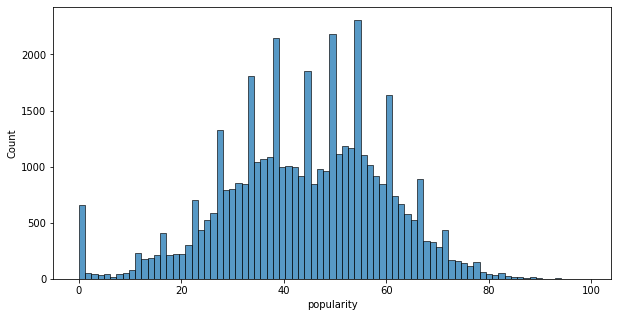

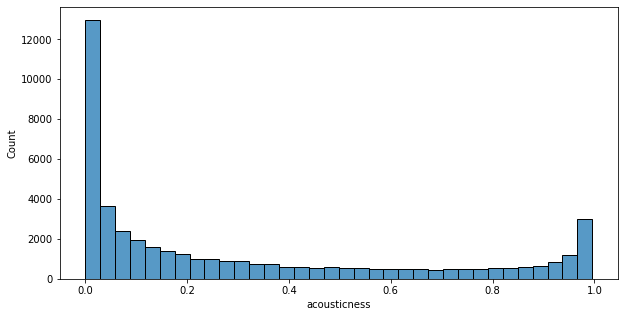

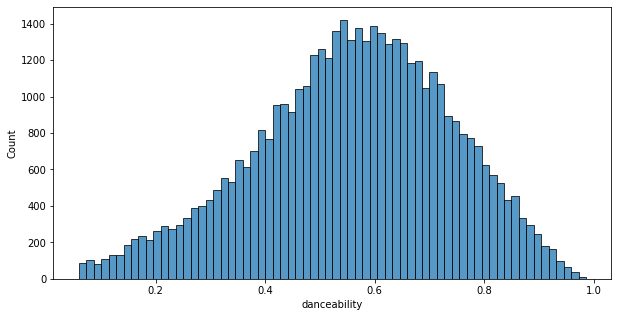

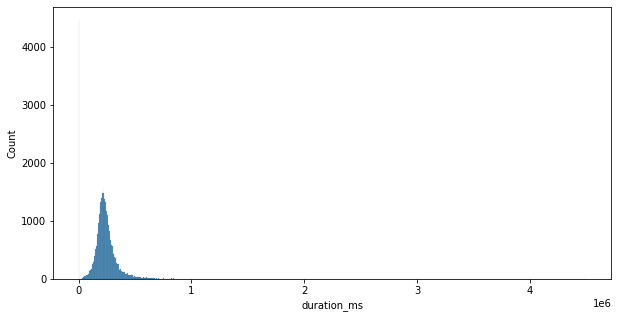

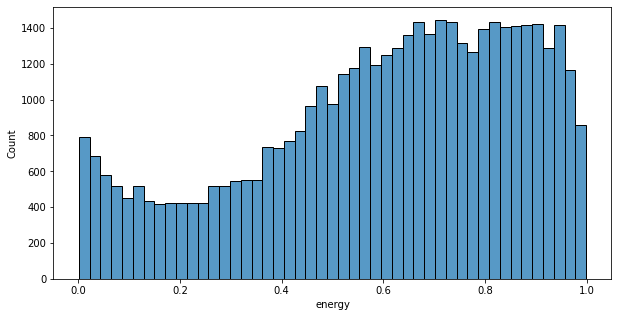

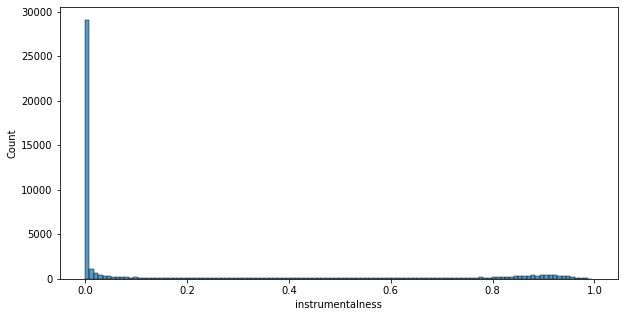

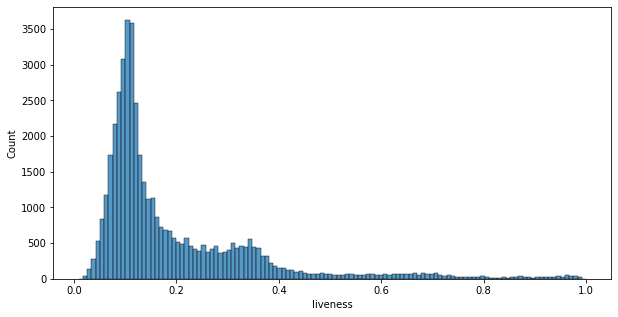

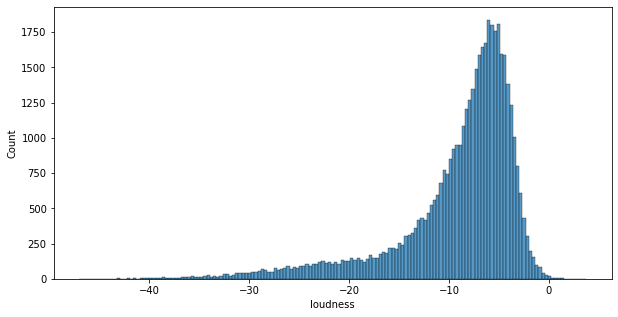

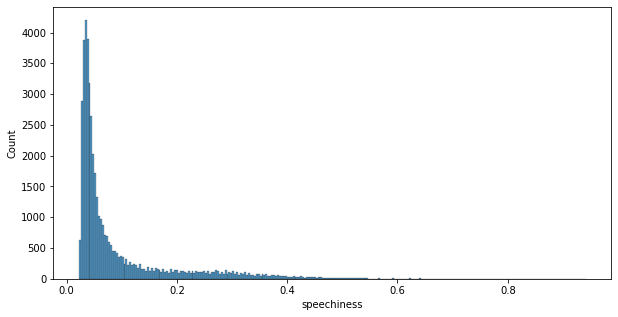

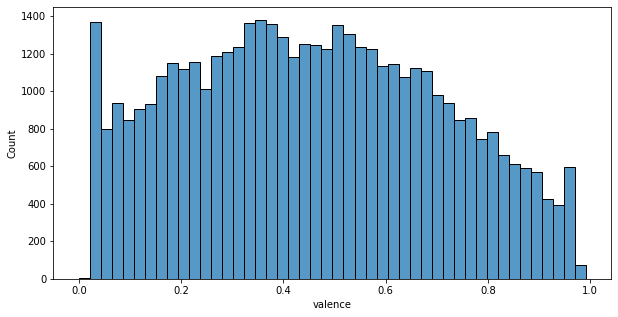

In [19]:
for col in numeric_features :
    plt.figure(figsize=[10,5])
    sns.histplot(df[col])

In [20]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence
count,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,5.350578,0.193951,-9.137016,0.358641,0.093783,0.456394
std,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,3.460945,0.161715,6.156400,0.479607,0.101469,0.247161
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.000000,0.009670,-47.046000,0.000000,0.022300,0.000000
25%,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,3.000000,0.096900,-10.860000,0.000000,0.036100,0.257000
50%,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,5.000000,0.126000,-7.284000,0.000000,0.048900,0.448000
75%,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,8.000000,0.244000,-5.177000,1.000000,0.098800,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,11.000000,1.000000,3.744000,1.000000,0.942000,0.992000


In [21]:
print(df.shape)

(45020, 14)


## Models

1. *Random Forest*
2. *K-Nereast Neighbors*
3. *Logistic Regression*

### 1. Random Forest

In [22]:

clf = RandomForestClassifier(n_estimators=100, random_state=25)

clf.fit(X_train, y_train)

print("Accuracy on train data:", clf.score(X_train, y_train))
print("Accuracy on test data:", clf.score(X_test, y_test))

Accuracy on train data: 0.9948763512512957
Accuracy on test data: 0.7177254553531763


Fine-tuning of metaparameters

1. 250 estimators

In [23]:
clf_1 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=25)
clf_1.fit(X_train, y_train)

print("Accuracy on test data:", clf_1.score(X_train, y_train))
print("Accuracy on test data:", clf_1.score(X_test, y_test))

Accuracy on test data: 0.7697023545091071
Accuracy on test data: 0.7136383829409152


2. 500 estimators

In [24]:
clf_2 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=15, min_samples_split=6, min_samples_leaf=2, random_state=25)
clf_2.fit(X_train, y_train)

print("Accuracy on test data:", clf_2.score(X_train, y_train))
print("Accuracy on test data:", clf_2.score(X_test, y_test))

Accuracy on test data: 0.9144972604768251
Accuracy on test data: 0.7268769435806308


Predict with best parameters

In [25]:
clf_predictions_best = clf_2.predict(X_test)

Results
Accuracy

In [26]:
clf_acc = accuracy_score(y_test, clf_predictions_best)
print(f'Random Forest accuracy: {clf_acc*100:.2f}%')

Random Forest accuracy: 72.69%


Classification Report

In [27]:
clf_report = classification_report(y_test, clf_predictions_best, output_dict=True)
df_report = pd.DataFrame(clf_report).transpose()
df_report

,f1-score,precision,recall,support
Alternative,0.358329,0.517355,0.274081,1142.000000
Classical,0.848995,0.867240,0.831502,1092.000000
Electronic/Anime,0.751335,0.764650,0.738476,2191.000000
Jazz/Blues,0.689837,0.685315,0.694420,2258.000000
Rap/Hip-Hop,0.847216,0.815538,0.881455,2227.000000
Rock/Country,0.705081,0.648639,0.772281,2345.000000
accuracy,0.726877,0.726877,0.726877,0.726877
macro avg,0.700132,0.716456,0.698702,11255.000000
weighted avg,0.717930,0.719493,0.726877,11255.000000


Heatmap of a confusion matrix

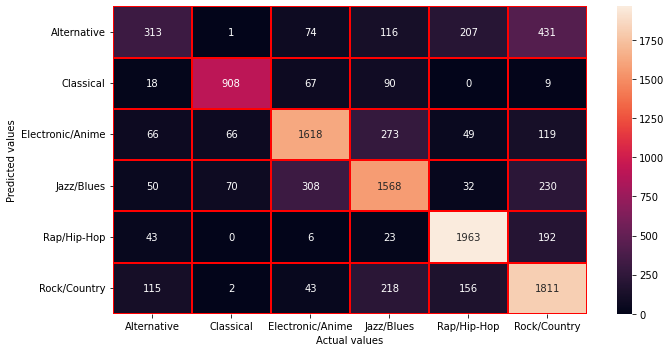

In [28]:
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, clf_predictions_best),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = clf_2.classes_,
    yticklabels = clf_2.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

plot the 5 most important features for random forest classifier in its decesion making

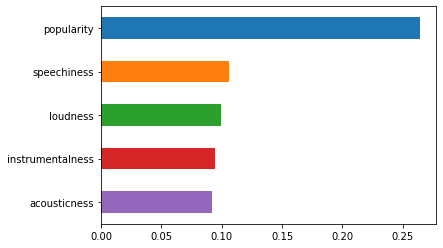

In [29]:
feat_importances = pd.Series(clf_2.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh').invert_yaxis()

### 2. KNN

In [30]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)

print("Accuracy on train data:", knn.score(X_train, y_train))
print("Accuracy on test data:", knn.score(X_test, y_test))

Accuracy on train data: 0.46974677920924035
Accuracy on test data: 0.29569080408707243


Fine-tuning of metaparameters

Trying k=1 to k=8 and plot the results

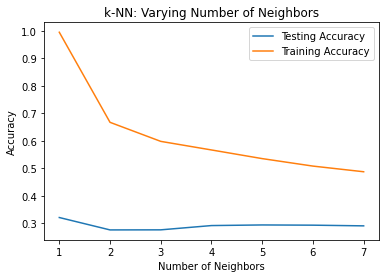

In [31]:
neighbors = np.arange(1, 8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    

    knn = KNeighborsClassifier(n_neighbors = k)


    knn.fit(X_train, y_train)


    train_accuracy[i] = knn.score(X_train, y_train)


    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Predict with best parameters

In [32]:
knn_best = KNeighborsClassifier(n_neighbors = 1)

knn_best.fit(X_train,y_train)
knn_predictions_best = knn_best.predict(X_test)

Results
Accuracy

In [33]:
knn_acc = accuracy_score(y_test, knn_predictions_best)
print(f'KNN accuracy: {knn_acc*100:.2f}%')

KNN accuracy: 32.15%


Classification Report

In [34]:
knn_report = classification_report(y_test, knn_predictions_best, output_dict=True)
df_report = pd.DataFrame(knn_report).transpose()
df_report

,f1-score,precision,recall,support
Alternative,0.138630,0.129057,0.149737,1142.000000
Classical,0.311533,0.342481,0.285714,1092.000000
Electronic/Anime,0.349763,0.363726,0.336832,2191.000000
Jazz/Blues,0.303344,0.295751,0.311337,2258.000000
Rap/Hip-Hop,0.456693,0.445203,0.468792,2227.000000
Rock/Country,0.281812,0.286596,0.277186,2345.000000
accuracy,0.321457,0.321457,0.321457,0.321457
macro avg,0.306962,0.310469,0.304933,11255.000000
weighted avg,0.322319,0.324268,0.321457,11255.000000


Heatmap of confusion matrix

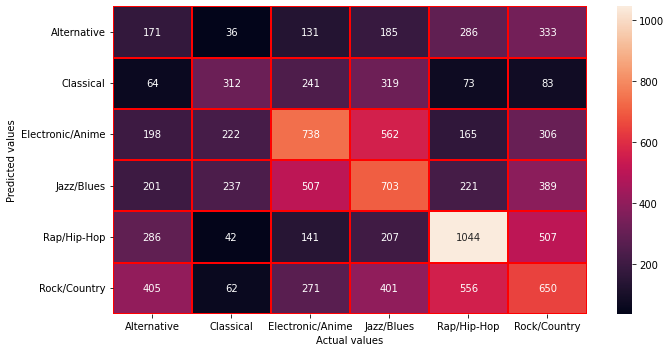

In [35]:
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, knn_predictions_best),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = knn.classes_,
    yticklabels = knn.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

### 3. Logistic Regression

In [36]:
log_reg = LogisticRegression()


log_reg.fit(X_train,y_train)


print("Accuracy on train data:", log_reg.score(X_train, y_train))
print("Accuracy on test data:", log_reg.score(X_test, y_test))

Accuracy on train data: 0.3666518584332889
Accuracy on test data: 0.3593958240781875


/Users/nazanin/.pyenv/versions/3.6.15/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fine-tuning of metaparameters
1

In [37]:
logreg_1 = LogisticRegression(solver="liblinear", penalty="l2")

logreg_1.fit(X_train, y_train)

print("Accuracy on test data:", logreg_1.score(X_train, y_train))
print("Accuracy on test data:", logreg_1.score(X_test, y_test))

Accuracy on test data: 0.443269657929809
Accuracy on test data: 0.43713904931141717


2

In [38]:
logreg_2 = LogisticRegression(solver="liblinear", penalty="l1")

logreg_2.fit(X_train, y_train)

print("Accuracy on test data:", logreg_2.score(X_train, y_train))
print("Accuracy on test data:", logreg_2.score(X_test, y_test))

Accuracy on test data: 0.6446320154005627
Accuracy on test data: 0.6364282541092847


3

In [39]:
logreg_3 = LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.5)

logreg_3.fit(X_train, y_train)

print("Accuracy on test data:", logreg_3.score(X_train, y_train))
print("Accuracy on test data:", logreg_3.score(X_test, y_test))

Accuracy on test data: 0.2001776988005331
Accuracy on test data: 0.20044424700133273


/Users/nazanin/.pyenv/versions/3.6.15/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Predict with best parameters

In [40]:
logreg_predictions_best = logreg_2.predict(X_test)

Results
Accuracy

In [42]:
logreg_acc = accuracy_score(y_test, logreg_predictions_best)
print(f'Logistic Regression accuracy: {logreg_acc*100:.2f}%')

Logistic Regression accuracy: 63.64%


Classification Report

In [43]:
logreg_report = classification_report(y_test, logreg_predictions_best, output_dict=True)
df_report = pd.DataFrame(logreg_report).transpose()
df_report

,f1-score,precision,recall,support
Alternative,0.108646,0.430303,0.062172,1142.000000
Classical,0.786588,0.778475,0.794872,1092.000000
Electronic/Anime,0.659686,0.609520,0.718850,2191.000000
Jazz/Blues,0.531144,0.583864,0.487157,2258.000000
Rap/Hip-Hop,0.797849,0.765580,0.832959,2227.000000
Rock/Country,0.624056,0.549287,0.722388,2345.000000
accuracy,0.636428,0.636428,0.636428,0.636428
macro avg,0.584662,0.619505,0.603066,11255.000000
weighted avg,0.610213,0.620911,0.636428,11255.000000


Heatmap of confusion matrix

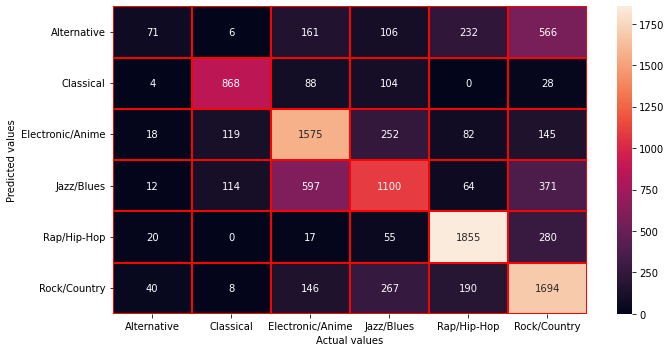

In [44]:
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, logreg_predictions_best),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = logreg_2.classes_,
    yticklabels = logreg_2.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()